<div style="font-size:18pt; padding-top:20px; text-align:center">СЕМИНАР 12. <b>Регуляризация, кросс-валидация и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Регуляризация</a></li>
        <li><a href="#2">Кросс-валидация</a>
        <li><a href="#3">Регуляризация и кросс-валидация</a></li>
        <li><a href="#4">Источники</a>
        </li>
    </ol>
</div>

<p><b>Подключение библиотек</b></p>

In [1]:
from sklearn import datasets
from scipy import stats
import numpy as np

from sklearn.cross_validation import cross_val_predict, train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

%matplotlib inline

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Регуляризация</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Регрессия</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html">Ridge</a>

In [2]:
from sklearn.linear_model import Ridge, Lasso

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from numpy.polynomial.polynomial import polyval

In [4]:
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=6, random_state=0)
y = stats.norm.rvs(size=n, loc=0, scale=0.2, random_state=0) + np.sin(x)

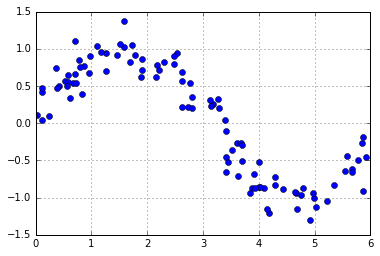

In [5]:
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p>Формирование обучающего и тестового подмножеств</p>

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [7]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

<p>Обучение</p>

In [8]:
plModelTr_PL = Pipeline([("plF", PolynomialFeatures(degree=20)), ("lr", Ridge(alpha=0, fit_intercept=True))])

plModelTr_PL.fit(x_train, y_train)

Pipeline(steps=[('plF', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('lr', Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

<p>Результат обучения</p>

In [9]:
print("Коэффициенты: ", plModelTr_PL.named_steps["lr"].coef_)
print("Пересечение: ", plModelTr_PL.named_steps["lr"].intercept_)
#print("Количество итераций: ", plModelTr_PL.named_steps["lr"].n_iter_)

Коэффициенты:  [  0.00000000e+00  -1.42733553e+01   9.79416894e+02  -7.98630218e+03
   3.17843173e+04  -7.71744893e+04   1.26292345e+05  -1.47515969e+05
   1.27619087e+05  -8.38357670e+04   4.25253233e+04  -1.68318848e+04
   5.22582348e+03  -1.27294722e+03   2.42033495e+02  -3.55077387e+01
   3.93820213e+00  -3.19158794e-01   1.78234337e-02  -6.12868689e-04
   9.77712688e-06]
Пересечение:  -35.6281204212


In [10]:
f_x = lambda x : polyval(x, plModelTr_PL.named_steps["lr"].coef_) + plModelTr_PL.named_steps["lr"].intercept_

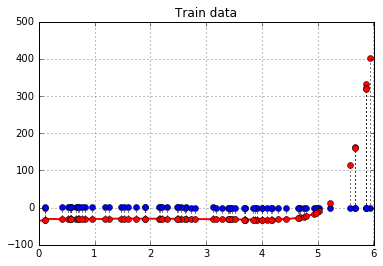

In [11]:
xx = np.linspace(0,5,100)

plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, f_x(xx), color="red", lw=2)
plt.plot(x_train, f_x(x_train), "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=f_x(x_train), colors="black", linestyles="dotted")
plt.grid(True)
plt.show()

<p>Проверка на тестовом подмножестве</p>

In [12]:
plModelTr_PL.score(x_test, y_test)

-7721.4841288628322

<p>График</p>

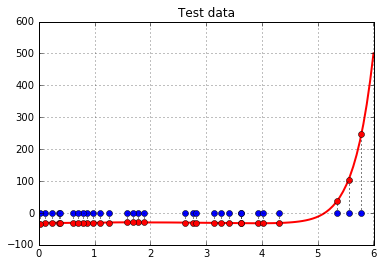

In [13]:
xx = np.linspace(0,6,100)

plt.title("Test data")
plt.plot(x_test, y_test, "o")
plt.plot(xx, f_x(xx), color="red", lw=2)
plt.plot(x_test, f_x(x_test), "o", color="red", lw=2)
plt.vlines(x_test, ymin=y_test, ymax=f_x(x_test), colors="black", linestyles="dotted")
plt.grid(True)
plt.show()

<p><b>Регуляризация</b></p>

In [14]:
plModelTr_PL = Pipeline([("plF", PolynomialFeatures(degree=20)), ("lr", Ridge(alpha=0.1, fit_intercept=True))])
#plModelTr_PL = Pipeline([("plF", PolynomialFeatures(degree=20)), ("lr", Lasso(alpha=0.01, fit_intercept=True))])

plModelTr_PL.fit(x_train, y_train)

Pipeline(steps=[('plF', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('lr', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [15]:
print("Коэффициенты: ", plModelTr_PL.named_steps["lr"].coef_)
print("Пересечение: ", plModelTr_PL.named_steps["lr"].intercept_)

Коэффициенты:  [  0.00000000e+00   3.22811373e-01   7.23526419e-02   3.24341587e-02
   5.80897445e-02   5.54689944e-02  -3.01873225e-03  -6.96208657e-02
  -6.33554781e-02   2.74468254e-02   7.80624294e-02  -1.90716870e-02
  -7.61346513e-02   8.24826899e-02  -4.25743964e-02   1.34995691e-02
  -2.81524223e-03   3.89662645e-04  -3.46130372e-05   1.79163316e-06
  -4.11694640e-08]
Пересечение:  0.308795810958


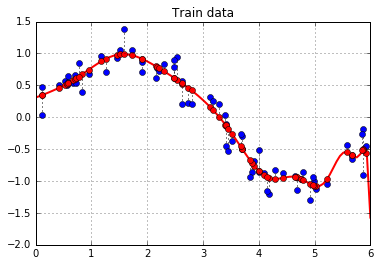

In [16]:
xx = np.linspace(0,6,100)

plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, f_x(xx), color="red", lw=2)
plt.plot(x_train, f_x(x_train), "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=f_x(x_train), colors="black", linestyles="dotted")
plt.grid(True)
plt.show()

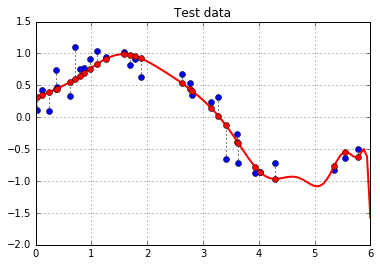

In [17]:
plt.title("Test data")
plt.plot(x_test, y_test, "o")
plt.plot(xx, f_x(xx), color="red", lw=2)
plt.plot(x_test, f_x(x_test), "o", color="red", lw=2)
plt.vlines(x_test, ymin=y_test, ymax=f_x(x_test), colors="black", linestyles="dotted")
plt.grid(True)
plt.show()

<p><b>Классификация</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">LogisticRegression</a>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Кросс-валидация</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Cross-validation</p>

<p>The holdout method</p>


<a href="http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html">train_test_split</a>


In [18]:
from sklearn import cross_validation

In [19]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.4, random_state=0)

In [20]:
x_train.shape, y_train.shape

((60,), (60,))

<p>K-Folds</p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html">KFold</a>

In [43]:
from sklearn.cross_validation import KFold
kf = KFold(6, n_folds=3, shuffle=True, random_state=0)
kf

sklearn.cross_validation.KFold(n=6, n_folds=3, shuffle=True, random_state=0)

In [22]:
for train_index, test_index in kf:
    print(train_index, test_index)

[0 1 3 4] [2 5]
[0 2 4 5] [1 3]
[1 2 3 5] [0 4]


<a href="http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html">cross_val_score</a>

In [23]:
from sklearn import svm

In [26]:
clf = svm.SVR(kernel='linear')
x_train = x_train.reshape(-1,1)
scores = cross_validation.cross_val_score(clf, x_train, y_train, cv=4)

In [27]:
scores

array([ 0.54362862,  0.65271321,  0.59332049,  0.6345154 ])

In [28]:
logReg = linear_model.LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1e5, 
                                         solver="lbfgs", random_state=12345)

In [29]:
linReg = linear_model.LinearRegression(fit_intercept=True)

In [30]:
scores = cross_validation.cross_val_score(linReg, x_train, y_train, cv=4, scoring="mean_squared_error")
scores

array([-0.23368173, -0.20889099, -0.23229557, -0.16142333])

In [31]:
print("Аккуратность: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 1.96))

Аккуратность: -0.21 (+/- 0.06)


<p>Leave-One-Out - LOO</p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.LeaveOneOut.html">LeaveOneOut</a>

In [32]:
from sklearn.cross_validation import LeaveOneOut

loo = LeaveOneOut(4)
for train, test in loo:
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


<p>Grid</p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html">GridSearchCV</a>

<a name="3"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">3. Регуляризация и кросс-валидация</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Ридж-регрессия с кросс-валидацией</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html">RidgeCV</a>

In [33]:
from sklearn.linear_model import RidgeCV

In [34]:
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=6, random_state=0)
y = stats.norm.rvs(size=n, loc=0, scale=0.2, random_state=0) + np.sin(x)

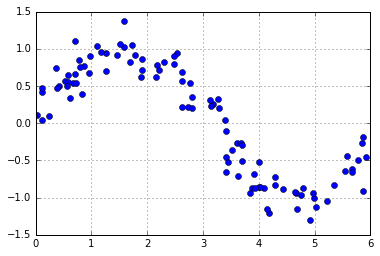

In [35]:
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p>Формирование обучающего и тестового подмножеств</p>

In [36]:
x = x[:, np.newaxis]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

<p>Обучение</p>

In [38]:
plModelTr_PL = Pipeline([("plF", PolynomialFeatures(degree=20)), ("lr", RidgeCV(alphas=[0.1, 10, 10e10, 10e20], 
                                                                               fit_intercept=True, cv=4, 
                                                                               store_cv_values=False))])#список альф, он сам выберет лучшее

plModelTr_PL.fit(x_train, y_train)

Pipeline(steps=[('plF', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('lr', RidgeCV(alphas=[0.1, 10, 100000000000.0, 1e+21], cv=4, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False))])

<p>Результат обучения</p>

In [39]:
print("Коэффициенты: ", plModelTr_PL.named_steps["lr"].coef_)
print("Пересечение: ", plModelTr_PL.named_steps["lr"].intercept_)
print("Альфа: ", plModelTr_PL.named_steps["lr"].alpha_ )

Коэффициенты:  [  0.00000000e+00   1.64880630e-11   1.46913451e-11  -2.93662574e-11
  -2.07987697e-10  -7.84381081e-10  -2.45414956e-09  -6.92810214e-09
  -1.80595413e-08  -4.35279801e-08  -9.58999490e-08  -1.88489676e-07
  -3.16456663e-07  -4.15602210e-07  -3.43403594e-07  -5.59332030e-08
   3.46770787e-07  -1.72582364e-07   3.64281633e-08  -3.62943911e-09
   1.40682192e-10]
Пересечение:  0.684589119225
Альфа:  100000000000.0


In [40]:
f_x = lambda x : polyval(x, plModelTr_PL.named_steps["lr"].coef_) + plModelTr_PL.named_steps["lr"].intercept_

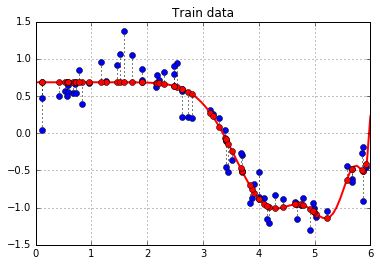

In [41]:
xx = np.linspace(0,6,100)

plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, f_x(xx), color="red", lw=2)
plt.plot(x_train, f_x(x_train), "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=f_x(x_train), colors="black", linestyles="dotted")
plt.grid(True)
plt.show()

<p>Проверка на тестовом подмножестве</p>

In [42]:
plModelTr_PL.score(x_test, y_test)

0.82853745412571433

<p><b>Классификация c кросс-валидацией</b></p>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html">LogisticRegressionCV</a>

<a name="4"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">4. Источники</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a href="http://scikit-learn.org/stable/modules/cross_validation.html">3.1. Cross-validation: evaluating estimator performance</a>